In [1]:
# Let`s import all packages that we may need:
import datetime
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn import cross_validation 
# from cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
data = pd.read_excel("long_data.xlsx",header = None)

In [3]:
data = data.iloc[2:,:]

In [4]:
data.drop(data.columns[[1,2,5,6,8,9,10,11,12,13]], axis=1, inplace=True)

In [5]:
data.columns= ['Date/Time','SteamLinePressure','BoilerPressure','FeedWaterTemp','RIHT1','RIHT2','RIHT3']

In [6]:
for ii in range(len(data['RIHT1'])):
    if isinstance(data.iloc[ii]['RIHT1'],str):
        data.iloc[ii]['RIHT1'] = np.nan
for ii in range(len(data['RIHT1'])):
    if(data.iloc[ii]['RIHT1']<240.0):
        data.iloc[ii]['RIHT1']=np.nan
for ii in range(len(data['RIHT2'])):
    if isinstance(data.iloc[ii]['RIHT2'],str):
        data.iloc[ii]['RIHT2'] = np.nan
for ii in range(len(data['RIHT2'])):
    if(data.iloc[ii]['RIHT2']<240.0):
        data.iloc[ii]['RIHT2']=np.nan
for ii in range(len(data['RIHT3'])):
    if isinstance(data.iloc[ii]['RIHT3'],str):
        data.iloc[ii]['RIHT3'] = np.nan
for ii in range(len(data['RIHT3'])):
    if(data.iloc[ii]['RIHT3']<240.0):
        data.iloc[ii]['RIHT3']=np.nan
for ii in range(len(data['SteamLinePressure'])):
    if isinstance(data.iloc[ii]['SteamLinePressure'],str):
        data.iloc[ii]['SteamLinePressure'] = np.nan
for ii in range(len(data['FeedWaterTemp'])):
    if isinstance(data.iloc[ii]['FeedWaterTemp'],str):
        data.iloc[ii]['FeedWaterTemp'] = np.nan
for ii in range(len(data['BoilerPressure'])):
    if isinstance(data.iloc[ii]['BoilerPressure'],str):
        data.iloc[ii]['BoilerPressure'] = np.nan
        
        

In [7]:
data=data.dropna()

In [8]:
data['RIHT'] = (data['RIHT1'] + data['RIHT2'] + data['RIHT3'])/3
# for ii in range(len(data['RIHT'])):
#     if(data.iloc[ii]['RIHT']<240.0):
#         data.iloc[ii]['RIHT']=np.nan
# data=data.dropna()
    

In [9]:
data

,Date/Time,SteamLinePressure,BoilerPressure,FeedWaterTemp,RIHT1,RIHT2,RIHT3,RIHT
2,2007-01-01 18:00:00,4282.88,4338.73,171.114,252.505,252.455,252.286,252.415
3,2007-01-02 18:00:00,4280.16,4340.1,171.765,252.638,252.431,252.267,252.445
4,2007-01-03 18:00:00,4283,4344.17,171.484,252.405,252.476,252.456,252.445
5,2007-01-04 18:00:00,4282.93,4337.8,171.604,252.482,252.355,252.185,252.341
6,2007-01-05 18:00:00,4288.08,4343.45,171.396,252.598,252.432,252.344,252.458
7,2007-01-06 18:00:00,4282.29,4335.73,171.589,252.417,252.344,252.267,252.343
8,2007-01-07 18:00:00,4283.92,4342.14,171.362,252.649,252.522,252.496,252.556
9,2007-01-08 18:00:00,4283.28,4339.51,171.381,252.739,252.352,252.086,252.392
10,2007-01-09 18:00:00,4286.85,4348.11,171.206,252.725,252.373,252.174,252.424
11,2007-01-10 18:00:00,4284.4,4343.72,171.219,252.737,252.508,252.177,252.474


C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


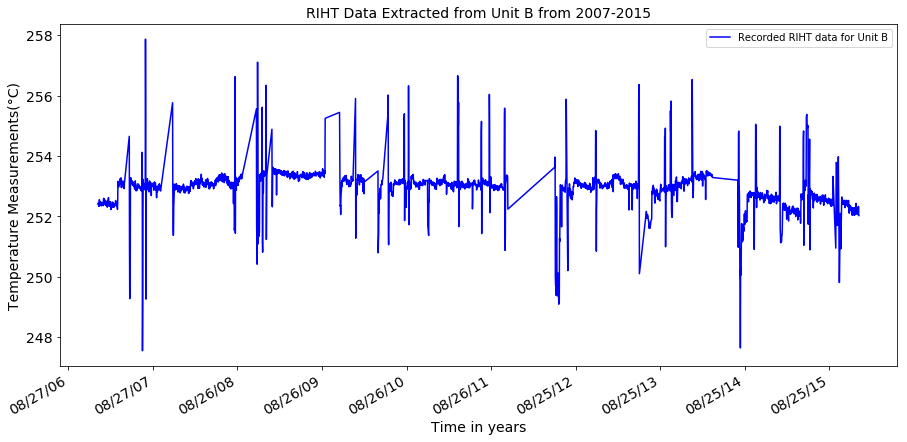

In [10]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data['Date/Time'], data['RIHT'], color = 'blue', label='Recorded RIHT data for Unit B')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
#ax.plot(test.index,inv_yhat , color='red', label='Predicted RIHT Temperature for Unit 3')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("RIHT Data Extracted from Unit B from 2007-2015",fontsize=14) 
ax.legend()
ax.set_xlabel("Time in years",fontsize=14)
ax.set_ylabel("Temperature Measurements("+degree_sign+"C)",fontsize=14)
# ax.set_ylabel("Scaled Measurements",fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

In [11]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [12]:
data.drop(data.columns[[4,5,6]], axis=1, inplace=True)

In [13]:
data=data.set_index('Date/Time')

In [14]:
data

,SteamLinePressure,BoilerPressure,FeedWaterTemp,RIHT
Date/Time,,,,
2007-01-01 18:00:00,4282.88,4338.73,171.114,252.415
2007-01-02 18:00:00,4280.16,4340.1,171.765,252.445
2007-01-03 18:00:00,4283,4344.17,171.484,252.445
2007-01-04 18:00:00,4282.93,4337.8,171.604,252.341
2007-01-05 18:00:00,4288.08,4343.45,171.396,252.458
2007-01-06 18:00:00,4282.29,4335.73,171.589,252.343
2007-01-07 18:00:00,4283.92,4342.14,171.362,252.556
2007-01-08 18:00:00,4283.28,4339.51,171.381,252.392
2007-01-09 18:00:00,4286.85,4348.11,171.206,252.424


In [15]:
values = data.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[4,5,6]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var4(t)
1   0.861162   0.868077   0.656780   0.471262  0.474193
2   0.856691   0.870294   0.663381   0.474193  0.474200
3   0.861363   0.876917   0.660534   0.474200  0.464057
4   0.861241   0.866556   0.661752   0.464057  0.475419
5   0.869727   0.875741   0.659640   0.475419  0.464221


C:\Users\Kunal Taneja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
values = reframed.values


train = values[:, :]
test = values[:,:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# print(test_X)
# We reshaped the input into the 3D format as expected by LSTMs, namely [sample

(2604, 1, 4) (2604,) (2604, 1, 4) (2604,)


## Checking fit of LSTM model over the RIHT

Train on 2604 samples, validate on 2604 samples
Epoch 1/100
2604/2604 [==============================] - 3s 974us/step - loss: 0.0536 - val_loss: 0.0036
Epoch 2/100
2604/2604 [==============================] - 1s 290us/step - loss: 0.0078 - val_loss: 0.0036
Epoch 3/100
2604/2604 [==============================] - 1s 373us/step - loss: 0.0080 - val_loss: 0.0035
Epoch 4/100
2604/2604 [==============================] - 1s 507us/step - loss: 0.0075 - val_loss: 0.0034
Epoch 5/100
2604/2604 [==============================] - 1s 470us/step - loss: 0.0066 - val_loss: 0.0034
Epoch 6/100
2604/2604 [==============================] - 1s 337us/step - loss: 0.0064 - val_loss: 0.0033
Epoch 7/100
2604/2604 [==============================] - 1s 304us/step - loss: 0.0061 - val_loss: 0.0032
Epoch 8/100
2604/2604 [==============================] - 1s 335us/step - loss: 0.0058 - val_loss: 0.0032
Epoch 9/100
2604/2604 [==============================] - 1s 269us/step - loss: 0.0056 - val_loss: 0.0032
Epoch 1

Epoch 78/100
2604/2604 [==============================] - 1s 236us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 79/100
2604/2604 [==============================] - 1s 283us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 80/100
2604/2604 [==============================] - 1s 451us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 81/100
2604/2604 [==============================] - 2s 663us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 82/100
2604/2604 [==============================] - 2s 818us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 83/100
2604/2604 [==============================] - 1s 426us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 84/100
2604/2604 [==============================] - 2s 733us/step - loss: 0.0029 - val_loss: 0.0029
Epoch 85/100
2604/2604 [==============================] - 1s 450us/step - loss: 0.0029 - val_loss: 0.0028
Epoch 86/100
2604/2604 [==============================] - 1s 241us/step - loss: 0.0030 - val_loss: 0.0028
Epoch 87/100
2604/2604 [======================

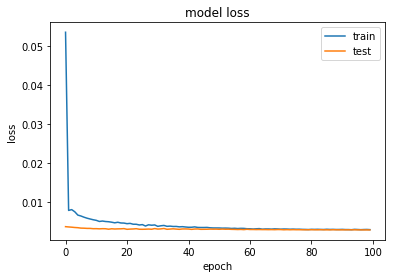

(2604, 4)
Test RMSE: 0.545


In [17]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences= False))
model.add(Dropout(0.5))
# model.add(LSTM(500))
# model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


positive_error = list()
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate(( test_X[:, 0:3],yhat), axis=1)
print(np.shape(inv_yhat))
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:,0:3],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
for xx in range(len(inv_y)):
    error = abs(inv_y[xx]-inv_yhat[xx])
    positive_error.append(error)
max_err= max(positive_error)
min_err =min(positive_error)

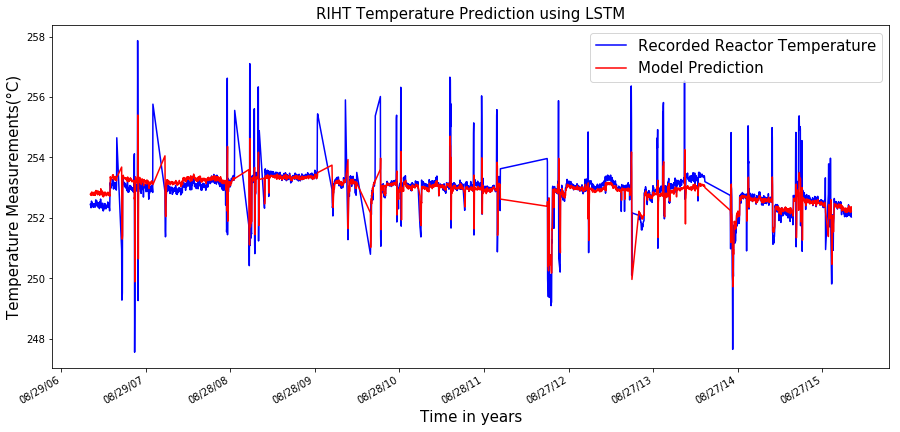

In [23]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index[:-1], inv_y, color = 'blue', label='Recorded Reactor Temperature')
hours = mdates.DayLocator(interval = 365)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
ax.plot(data.index[:-1], inv_yhat ,color ='red', label='Model Prediction')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("RIHT Temperature Prediction using LSTM",fontsize=15) 
ax.legend(loc='upper right',fontsize=15)
ax.set_xlabel("Time in years",fontsize=15)
ax.set_ylabel("Temperature Measurements("+degree_sign+"C)",fontsize=15)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.show()

In [24]:
max_err


5.201824704089319

In [25]:
min_err


0.0004150380967473666

In [26]:
pos = list()
neg = list()
for xx in range(len(inv_y)):
    error = (inv_y[xx]-inv_yhat[xx])
    if (error>=0):
        neg.append(error)
    else:
        pos.append(error)
max_negerr= max(neg)
max_poserr =min(pos)


In [27]:
max_poserr

-5.135388122189369

In [28]:
max_negerr

5.201824704089319

In [29]:
np.mean(inv_y)

252.9211773576946

In [30]:
np.mean(inv_yhat)

252.89120777473858

In [31]:
np.var(inv_y)

0.5184040078940547

In [32]:
np.var(inv_yhat)

0.23348185299879365

## LSTM - train Jan 2007 - Dec 2014 , predicting RIHT for year 2015

In [33]:
values = reframed.values


train = values[:365*6, :]
test = values[365*6:,:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(2190, 1, 4) (2190,) (414, 1, 4) (414,)


Train on 2190 samples, validate on 414 samples
Epoch 1/100
2190/2190 [==============================] - 2s 891us/step - loss: 0.0673 - val_loss: 0.0050
Epoch 2/100
2190/2190 [==============================] - 0s 220us/step - loss: 0.0097 - val_loss: 0.0044
Epoch 3/100
2190/2190 [==============================] - 1s 249us/step - loss: 0.0081 - val_loss: 0.0043
Epoch 4/100
2190/2190 [==============================] - 1s 245us/step - loss: 0.0077 - val_loss: 0.0043
Epoch 5/100
2190/2190 [==============================] - 1s 235us/step - loss: 0.0074 - val_loss: 0.0041
Epoch 6/100
2190/2190 [==============================] - 1s 275us/step - loss: 0.0070 - val_loss: 0.0040
Epoch 7/100
2190/2190 [==============================] - 1s 262us/step - loss: 0.0069 - val_loss: 0.0041
Epoch 8/100
2190/2190 [==============================] - 1s 398us/step - loss: 0.0067 - val_loss: 0.0039
Epoch 9/100
2190/2190 [==============================] - 1s 365us/step - loss: 0.0065 - val_loss: 0.0039
Epoch 10

Epoch 78/100
2190/2190 [==============================] - 0s 198us/step - loss: 0.0034 - val_loss: 0.0027
Epoch 79/100
2190/2190 [==============================] - 0s 198us/step - loss: 0.0032 - val_loss: 0.0027
Epoch 80/100
2190/2190 [==============================] - 1s 276us/step - loss: 0.0034 - val_loss: 0.0027
Epoch 81/100
2190/2190 [==============================] - 1s 363us/step - loss: 0.0032 - val_loss: 0.0027
Epoch 82/100
2190/2190 [==============================] - 0s 216us/step - loss: 0.0032 - val_loss: 0.0027
Epoch 83/100
2190/2190 [==============================] - 0s 197us/step - loss: 0.0033 - val_loss: 0.0027
Epoch 84/100
2190/2190 [==============================] - 0s 204us/step - loss: 0.0032 - val_loss: 0.0027
Epoch 85/100
2190/2190 [==============================] - 1s 253us/step - loss: 0.0033 - val_loss: 0.0026
Epoch 86/100
2190/2190 [==============================] - 0s 194us/step - loss: 0.0032 - val_loss: 0.0027
Epoch 87/100
2190/2190 [======================

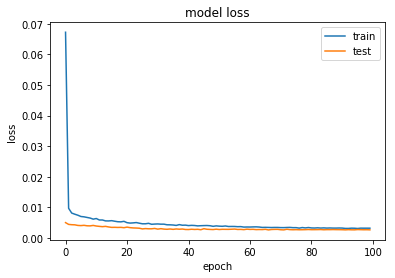

(414, 4)
Test RMSE: 0.528


In [34]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences= False))
model.add(Dropout(0.5))
# model.add(LSTM(500))
# model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


positive_error = list()
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate(( test_X[:, 0:3],yhat), axis=1)
print(np.shape(inv_yhat))
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:,0:3],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
for xx in range(len(inv_y)):
    error = abs(inv_y[xx]-inv_yhat[xx])
    positive_error.append(error)
max_err= max(positive_error)
max_index = positive_error.index(max(positive_error))
min_err =min(positive_error)

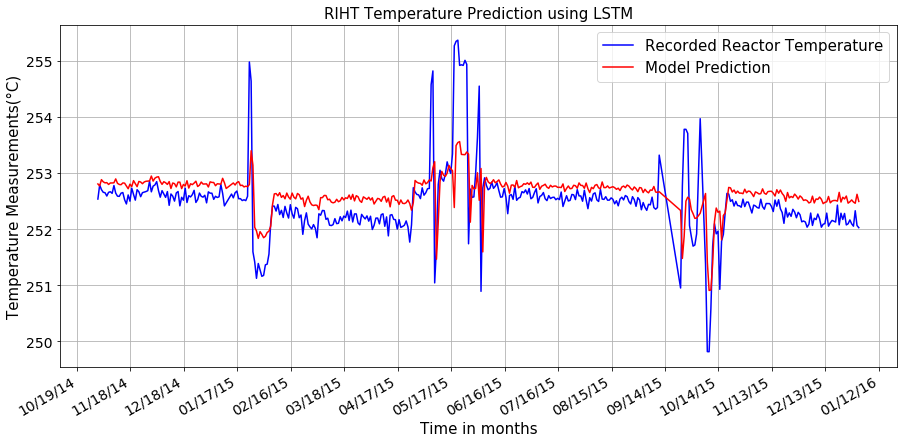

In [43]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index[(6*365)+1:], inv_y, color = 'blue', label='Recorded Reactor Temperature')
hours = mdates.DayLocator(interval = 30)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
ax.plot(data.index[(6*365)+1:], inv_yhat ,color ='red', label='Model Prediction')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("RIHT Temperature Prediction using LSTM",fontsize=15) 
ax.legend(loc='upper right',fontsize=15)
ax.set_xlabel("Time in months",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylabel("Temperature Measurements("+degree_sign+"C)",fontsize=15)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.grid()
plt.show()

In [44]:
pos = list()
neg = list()
for xx in range(len(inv_y)):
    error = (inv_y[xx]-inv_yhat[xx])
    if (error>=0):
        neg.append(error)
    else:
        pos.append(error)
max_negerr= max(neg)
max_poserr =min(pos)


In [45]:
max_err

2.8863439049734154

In [46]:
min_err

0.00037450380960990515

In [47]:
max_poserr

-2.1925221195415645

In [81]:
max_negerr


3.4917550613244828

In [82]:
np.mean(inv_y)

252.66853342966283

In [83]:
np.mean(inv_yhat)

252.6672603737006

In [84]:
np.var(inv_y)

0.5376427319929405

In [85]:
np.var(inv_yhat)

0.13595005748064223

## Predicting RIHT for Dec 2015 based on training time from Jan 2007-Nov2015

In [51]:
values = reframed.values


train = values[:2575, :]
test = values[2575:,:]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(2575, 1, 4) (2575,) (29, 1, 4) (29,)


Train on 2575 samples, validate on 29 samples
Epoch 1/100
2575/2575 [==============================] - 2s 777us/step - loss: 0.0659 - val_loss: 0.0014
Epoch 2/100
2575/2575 [==============================] - 0s 194us/step - loss: 0.0087 - val_loss: 8.9111e-04
Epoch 3/100
2575/2575 [==============================] - 0s 187us/step - loss: 0.0079 - val_loss: 0.0011
Epoch 4/100
2575/2575 [==============================] - 1s 197us/step - loss: 0.0080 - val_loss: 0.0012
Epoch 5/100
2575/2575 [==============================] - 1s 232us/step - loss: 0.0070 - val_loss: 9.2814e-04
Epoch 6/100
2575/2575 [==============================] - 1s 199us/step - loss: 0.0067 - val_loss: 8.2783e-04
Epoch 7/100
2575/2575 [==============================] - 1s 196us/step - loss: 0.0065 - val_loss: 6.9688e-04
Epoch 8/100
2575/2575 [==============================] - 1s 198us/step - loss: 0.0063 - val_loss: 7.1704e-04
Epoch 9/100
2575/2575 [==============================] - 1s 199us/step - loss: 0.0058 - val_lo

2575/2575 [==============================] - 1s 203us/step - loss: 0.0031 - val_loss: 2.1317e-04
Epoch 76/100
2575/2575 [==============================] - 1s 202us/step - loss: 0.0031 - val_loss: 1.9593e-04
Epoch 77/100
2575/2575 [==============================] - 1s 228us/step - loss: 0.0030 - val_loss: 2.3285e-04
Epoch 78/100
2575/2575 [==============================] - 1s 227us/step - loss: 0.0031 - val_loss: 2.3853e-04
Epoch 79/100
2575/2575 [==============================] - 1s 236us/step - loss: 0.0030 - val_loss: 2.1238e-04
Epoch 80/100
2575/2575 [==============================] - 1s 306us/step - loss: 0.0030 - val_loss: 2.6145e-04
Epoch 81/100
2575/2575 [==============================] - 1s 339us/step - loss: 0.0030 - val_loss: 2.5580e-04
Epoch 82/100
2575/2575 [==============================] - 1s 209us/step - loss: 0.0030 - val_loss: 2.5406e-04
Epoch 83/100
2575/2575 [==============================] - 1s 221us/step - loss: 0.0030 - val_loss: 2.4780e-04
Epoch 84/100
2575/2575 

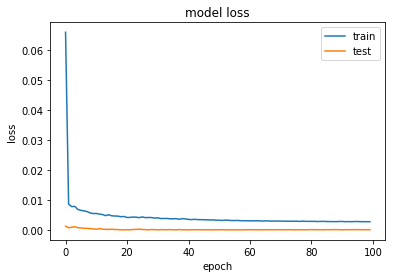

(29, 4)
Test RMSE: 0.163


In [52]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences= False))
model.add(Dropout(0.5))
# model.add(LSTM(500))
# model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


positive_error = list()
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=1, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate(( test_X[:, 0:3],yhat), axis=1)
print(np.shape(inv_yhat))
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_X[:,0:3],test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)
for xx in range(len(inv_y)):
    error = abs(inv_y[xx]-inv_yhat[xx])
    positive_error.append(error)
max_err= max(positive_error)
max_index = positive_error.index(max(positive_error))
min_err =min(positive_error)

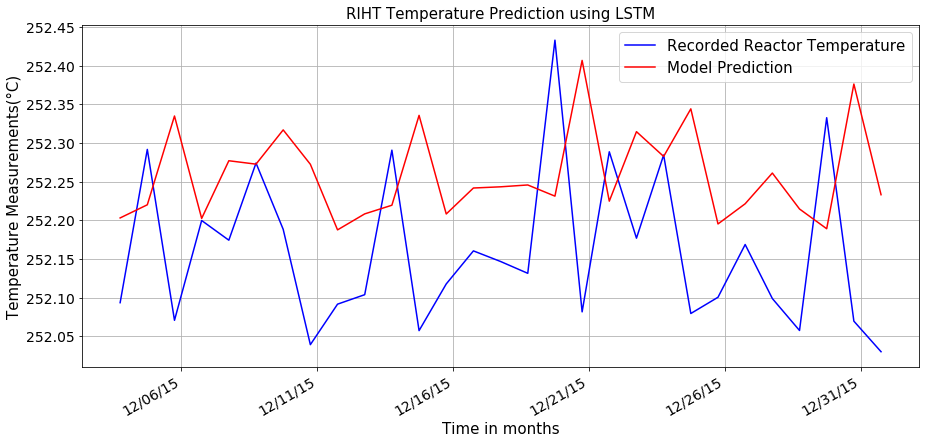

In [55]:
degree_sign= u'\N{DEGREE SIGN}'
import matplotlib.dates as mdates
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(15)
ax.plot(data.index[(2575)+1:], inv_y, color = 'blue', label='Recorded Reactor Temperature')
hours = mdates.DayLocator(interval = 5)
h_fmt = mdates.DateFormatter('%D')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt) 
ax.plot(data.index[(2575)+1:], inv_yhat ,color ='red', label='Model Prediction')
# ax.plot(test.index[0],[252.85],color='white',label = "----Prediction Results----")
# ax.plot(test.index[0],[252.85],color='white',label = "Max Error :"+"{0:.4f}".format(max_err)+" "+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Min Error : 1.269e-06"+degree_sign+"C")
# ax.plot(test.index[0],[252.85],color='white',label = "Average Error (RMSE) :"+"{0:.4f}".format(rmse)+" "+degree_sign+"C")
ax.set_title("RIHT Temperature Prediction using LSTM",fontsize=15) 
ax.legend(loc='upper right',fontsize=15)
ax.set_xlabel("Time in months",fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=14)

ax.tick_params(axis='both', which='minor', labelsize=14)
ax.set_ylabel("Temperature Measurements("+degree_sign+"C)",fontsize=15)
# ax.set_xlim(datetime.datetime(2007, 1, 1),datetime.datetime(2015, 12, 31))
fig.autofmt_xdate()
plt.grid()
plt.show()

In [56]:
max_err

0.3251033556868208

In [57]:
min_err

0.0014469936801617678